In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd


In [2]:
df = pd.read_excel('anonymized_dataset (1) (2).xlsx')


In [3]:
df.head()

,Agencyid,Event_Source,EventType,Priority,City,District,Createddate,CreationDay,CreationMonth,CreationYear,EventCreatedDateTime,EventCreatedDateTime.1,Firstunitdispatchedtime,Firstunitarrivedtime,Closingtime,Closingdate,Createdhour,Arrivaltimeinsec
0,Civil Defense,Phone call,Rescue,3,Chicago,Magnificent Mile,2022-03-01,1,3,2022,2022-01-03 00:05:02,00:05:02,00:07:30,NaN,03:25:36,03/01/22,0,NaN
1,Civil Defense,Phone call,Rescue,1,Chicago,Magnificent Mile,2022-03-01,1,3,2022,2022-01-03 00:14:49,00:14:49,00:22:46,NaN,03:25:23,03/01/22,0,NaN
2,Civil Defense,Phone call,Rescue,2,Chicago,Lincoln Park,2022-03-01,1,3,2022,2022-01-03 00:33:48,00:33:48,00:34:01,NaN,00:40:49,03/01/22,0,NaN
3,Civil Defense,Phone call,Fire,1,Chicago,West Garfield Park,2022-03-01,1,3,2022,2022-01-03 00:45:04,00:45:04,00:50:26,NaN,03:25:11,03/01/22,0,NaN
4,Civil Defense,Phone call,Fire,1,Chicago,Oakland,2022-03-01,1,3,2022,2022-01-03 00:47:01,00:47:01,00:48:32,NaN,03:24:37,03/01/22,0,NaN


In [4]:
df.info

<bound method DataFrame.info of            Agencyid Event_Source EventType  Priority     City  \
0     Civil Defense   Phone call    Rescue         3  Chicago   
1     Civil Defense   Phone call    Rescue         1  Chicago   
2     Civil Defense   Phone call    Rescue         2  Chicago   
3     Civil Defense   Phone call      Fire         1  Chicago   
4     Civil Defense   Phone call      Fire         1  Chicago   
...             ...          ...       ...       ...      ...   
7667  Civil Defense   Phone call    Rescue         3  Chicago   
7668  Civil Defense   Phone call      Fire         1  Chicago   
7669  Civil Defense   Phone call      Fire         1  Chicago   
7670  Civil Defense   Phone call      Fire         1  Chicago   
7671  Civil Defense   Phone call    Rescue         1  Chicago   

                District Createddate  CreationDay  CreationMonth  \
0       Magnificent Mile  2022-03-01            1              3   
1       Magnificent Mile  2022-03-01            1  

In [ ]:
Analysis: 
    1. Eventtype per district,
    2. Priority and event type
    3. Priority and dispatch time
    4. Created time vs time dispatch vs closing time
    5. priority, district and dispatch time
    

In [10]:
Eventtype_list = df["EventType"]
Eventtype_list

0       Rescue
1       Rescue
2       Rescue
3         Fire
4         Fire
         ...  
7667    Rescue
7668      Fire
7669      Fire
7670      Fire
7671    Rescue
Name: EventType, Length: 7672, dtype: object

In [11]:
District_list = df["District"]
District_list

0         Magnificent Mile
1         Magnificent Mile
2             Lincoln Park
3       West Garfield Park
4                  Oakland
               ...        
7667               Oakland
7668      Magnificent Mile
7669               Oakland
7670            South Side
7671            South Side
Name: District, Length: 7672, dtype: object

In [12]:
eventdistrict_list=list(zip(Eventtype_list,District_list ))
eventdistrict_list

[('Rescue', 'Magnificent Mile'),
 ('Rescue', 'Magnificent Mile'),
 ('Rescue', 'Lincoln Park'),
 ('Fire', 'West Garfield Park'),
 ('Fire', 'Oakland'),
 ('Fire', 'Austin'),
 ('Rescue', 'Chinatown'),
 ('Fire', 'Austin'),
 ('Rescue', 'River North'),
 ('Rescue', 'South Side'),
 ('Fire', 'Englewood'),
 ('Rescue', 'Chinatown'),
 ('Rescue', 'West Garfield Park'),
 ('Fire', 'Magnificent Mile'),
 ('Rescue', 'River North'),
 ('Fire', 'South Side'),
 ('Fire', 'Oakland'),
 ('Fire', 'Lincoln Park'),
 ('Rescue', 'Oakland'),
 ('Fire', 'Chinatown'),
 ('Fire', 'South Side'),
 ('Fire', 'Lincoln Park'),
 ('Fire', 'Magnificent Mile'),
 ('Fire', 'Oakland'),
 ('Fire', 'Chinatown'),
 ('Rescue', 'Lincoln Park'),
 ('Fire', 'little village'),
 ('Fire', 'Magnificent Mile'),
 ('Fire', 'little village'),
 ('Rescue', 'South Side'),
 ('Fire', 'Magnificent Mile'),
 ('Fire', 'West Garfield Park'),
 ('Fire', 'River North'),
 ('Rescue', 'Lincoln Park'),
 ('Fire', 'Austin'),
 ('Traffic accidents', 'Chinatown'),
 ('Fire', 

In [14]:
set(Eventtype_list)

{'Fire', 'Rescue', 'Traffic accidents'}

In [15]:
set(District_list)

{'Austin',
 'Chinatown',
 'Englewood',
 'Lincoln Park',
 'Magnificent Mile',
 'Oakland',
 'River North',
 'South Side',
 'West Garfield Park',
 'little village'}

In [25]:
eventdistrict_list=list(zip(Eventtype_list,District_list ))

Fire_Count = {'Austin': 0, 'Chinatown': 0, 'Englewood': 0, 'Lincoln Park': 0, 'Magnificent Mile': 0, 'Oakland': 0,'River North': 0,'South Side': 0, 'West Garfield Park':0,'little village':0} 
Rescue_Count = {'Austin': 0, 'Chinatown': 0, 'Englewood': 0, 'Lincoln Park': 0, 'Magnificent Mile': 0,'Oakland': 0,'River North': 0,'South Side': 0, 'West Garfield Park':0,'little village':0} 
Traffic_Count = {'Austin': 0, 'Chinatown': 0, 'Englewood': 0, 'Lincoln Park': 0, 'Magnificent Mile': 0,'Oakland': 0,'River North': 0,'South Side': 0, 'West Garfield Park':0,'little village':0} 

for event, district in eventdistrict_list:
    if event == "Fire" and district in Fire_Count:
        Fire_Count[district] += 1
        
for event, district in eventdistrict_list:
    if event == "Rescue" and district in Rescue_Count:
        Rescue_Count[district] += 1
        
for event, district in eventdistrict_list:
    if event == "Traffic accidents" and district in Traffic_Count:
        Traffic_Count[district] += 1
        
print(Fire_Count['Austin'], Fire_Count['Chinatown'], Fire_Count['Englewood'],Fire_Count['Lincoln Park'],Fire_Count['Magnificent Mile'],Fire_Count['Oakland'],Fire_Count['River North'],Fire_Count['South Side'],Fire_Count['West Garfield Park'],Fire_Count['little village'])
print(Rescue_Count['Austin'], Rescue_Count['Chinatown'], Rescue_Count['Englewood'],Rescue_Count['Lincoln Park'],Rescue_Count['Magnificent Mile'],Rescue_Count['Oakland'],Rescue_Count['River North'],Rescue_Count['South Side'],Rescue_Count['West Garfield Park'],Rescue_Count['little village'])
print(Traffic_Count['Austin'], Traffic_Count['Chinatown'], Traffic_Count['Englewood'],Traffic_Count['Lincoln Park'],Traffic_Count['Magnificent Mile'],Traffic_Count['Oakland'],Traffic_Count['River North'],Traffic_Count['South Side'],Traffic_Count['West Garfield Park'],Traffic_Count['little village'])

354 326 343 348 329 325 317 341 382 367
338 338 357 408 416 361 360 379 371 375
51 49 68 42 57 65 51 49 51 54


ploting Data

In [37]:
import numpy as np

In [38]:
import matplotlib.pyplot as plt

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7672,) and arg 1 with shape (10,).

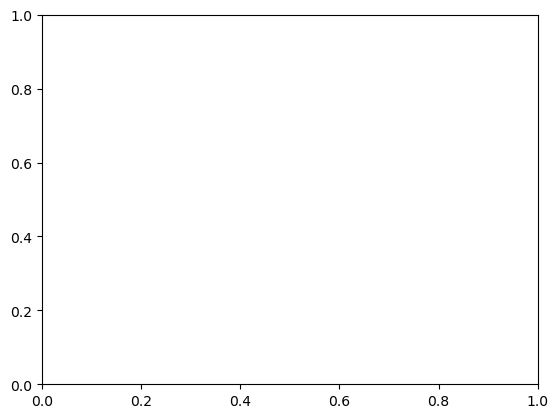

In [39]:
District_List = ['Austin', 'Chinatown', 'Englewood', 'Lincoln Park', 'Magnificent Mile', 'Oakland', 'River North', 'South Side', 'West Garfield Park','little village']
Fire_Count = [354, 326, 343, 348, 329, 325, 317, 341, 382, 367]
Rescue_Count= [338, 338, 357, 408, 416, 361, 360, 379, 371, 375]
Traffic_Count =[51, 49, 68, 42, 57, 65, 51, 49, 51, 54]

# Set the width of the bars
bar_width = 0.25

# Create an array for the x-axis positions of the bars

x = np.arange(len(District_list))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create bars for each loan purpose and group them by gender

bar1 = ax.bar(x - bar_width, Fire_Count, bar_width, label='Fire')
bar2 = ax.bar(x,Rescue_Count , bar_width, label='Rescue')
bar3 = ax.bar(x + bar_width,Traffic_Count , bar_width, label='Traffic accidents')

# Set labels, title, and legend

ax.set_xlabel('District_list')
ax.set_ylabel('Total')
ax.set_title('Emergency by Disrict')
ax.set_xticks(x)
ax.set_xticklabels(District_List,rotation=90)
ax.legend()
# Show the plot
plt.show()









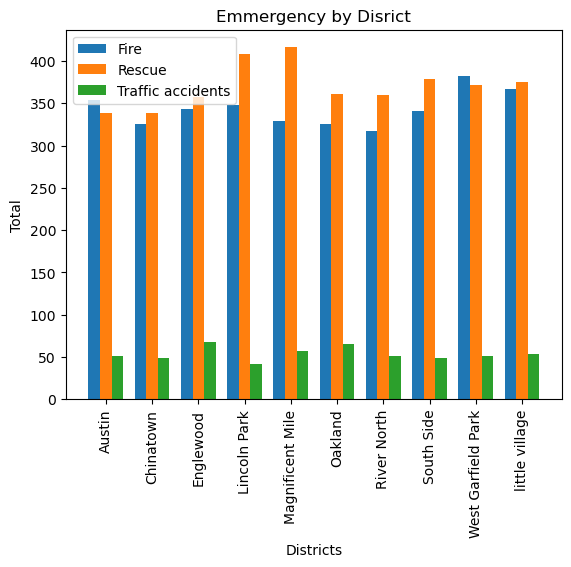

In [40]:
Districts=['Austin','Chinatown','Englewood','Lincoln Park','Magnificent Mile','Oakland','River North','South Side','West Garfield Park','little village']
Fire_counts=[354,326,343,348,329,325,317,341,382,367]
Rescue_counts=[338,338,357,408,416,361,360,379,371,375]
Traffic_counts=[51,49,68,42,57,65,51,49,51,54]
# Set the width of the bars
bar_width = 0.25
# Create an array for the x-axis positions of the bars
x = np.arange(len(Districts))
# Create the figure and axis objects
fig, ax = plt.subplots()
# Create bars for each loan purpose and group them by gender
bar1 = ax.bar(x - bar_width, Fire_counts, bar_width, label='Fire')
bar2 = ax.bar(x,Rescue_counts , bar_width, label='Rescue')
bar3 = ax.bar(x + bar_width,Traffic_counts , bar_width, label='Traffic accidents')
# Set labels, title, and legend
ax.set_xlabel('Districts')
ax.set_ylabel('Total')
ax.set_title('Emmergency by Disrict')
ax.set_xticks(x)
ax.set_xticklabels(Districts,rotation=90)
ax.legend()
# Show the plot
plt.show()
